<a href="https://colab.research.google.com/github/Mohammed-Abdul-Rafe-Sajid/ML-LAB/blob/main/3_Feature_selection_with_Correlation_and_MI_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt

In [2]:
org_data=pd.read_csv("/content/drive/MyDrive/CBIT/ML/FeatureEngg-Datasets/Qinspection.csv")

In [3]:
 org_data

,feature1,feature2,feature3,feature4,feature5,feature6,class
0,4.9,4.7,3.2,1.3,0.2,0.3,A
1,4.8,4.6,3.1,1.5,0.2,0.3,A
2,5.2,5.0,3.6,1.4,0.2,0.3,A
3,5.6,5.4,3.9,1.7,0.4,0.5,A
4,4.8,4.6,3.4,1.4,0.3,0.4,A
...,...,...,...,...,...,...,...
139,7.0,6.8,3.2,5.9,2.3,2.4,C
140,6.9,6.7,3.3,5.7,2.5,2.6,C
141,6.9,6.7,3.0,5.2,2.3,2.4,C
142,6.5,6.3,2.5,5.0,1.9,2.0,C


In [ ]:
org_data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,class
0,4.9,4.7,3.2,1.3,0.2,0.3,A
1,4.8,4.6,3.1,1.5,0.2,0.3,A
2,5.2,5.0,3.6,1.4,0.2,0.3,A
3,5.6,5.4,3.9,1.7,0.4,0.5,A
4,4.8,4.6,3.4,1.4,0.3,0.4,A


In [ ]:
org_data.shape

(144, 7)

In [ ]:
org_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  144 non-null    float64
 1   feature2  144 non-null    float64
 2   feature3  144 non-null    float64
 3   feature4  144 non-null    float64
 4   feature5  144 non-null    float64
 5   feature6  144 non-null    float64
 6   class     144 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.0+ KB


In [ ]:
org_data.describe()

,feature1,feature2,feature3,feature4,feature5,feature6
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,6.052083,5.852083,3.054861,3.764583,1.199306,1.299306
std,0.838161,0.838161,0.441996,1.769575,0.761623,0.761623
min,4.500000,4.300000,2.000000,1.000000,0.100000,0.200000
25%,5.300000,5.100000,2.800000,1.600000,0.300000,0.400000
50%,6.000000,5.800000,3.000000,4.350000,1.300000,1.400000
75%,6.600000,6.400000,3.300000,5.100000,1.800000,1.900000
max,8.100000,7.900000,4.400000,6.900000,2.500000,2.600000


In [5]:
org_data.isnull().sum() #org_data.isnull().any()

,0
feature1,0
feature2,0
feature3,0
feature4,0
feature5,0
feature6,0
class,0


### No missing values in any column


In [7]:
features=org_data.iloc[:,:6]

In [9]:
features.iloc[:,:]

,feature1,feature2,feature3,feature4,feature5,feature6
0,4.9,4.7,3.2,1.3,0.2,0.3
1,4.8,4.6,3.1,1.5,0.2,0.3
2,5.2,5.0,3.6,1.4,0.2,0.3
3,5.6,5.4,3.9,1.7,0.4,0.5
4,4.8,4.6,3.4,1.4,0.3,0.4
...,...,...,...,...,...,...
139,7.0,6.8,3.2,5.9,2.3,2.4
140,6.9,6.7,3.3,5.7,2.5,2.6
141,6.9,6.7,3.0,5.2,2.3,2.4
142,6.5,6.3,2.5,5.0,1.9,2.0


In [10]:
target=org_data.iloc[:,6:]

In [14]:
target

,class
0,A
1,A
2,A
3,A
4,A
...,...
139,C
140,C
141,C
142,C


In [18]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
tfeatures=std.fit_transform(features)

In [19]:
# converting tfeatures matrix into dataframe
tdf=pd.DataFrame(tfeatures,columns=['feature1','feature2','feature3','feature4','feature5','feature6'])
tdf

,feature1,feature2,feature3,feature4,feature5,feature6
0,-1.379335,-1.379335,0.329517,-1.397616,-1.316654,-1.316654
1,-1.499061,-1.499061,0.102481,-1.284200,-1.316654,-1.316654
2,-1.020160,-1.020160,1.237661,-1.340908,-1.316654,-1.316654
3,-0.541258,-0.541258,1.918768,-1.170784,-1.053140,-1.053140
4,-1.499061,-1.499061,0.783589,-1.340908,-1.184897,-1.184897
...,...,...,...,...,...,...
139,1.134896,1.134896,0.329517,1.210952,1.450240,1.450240
140,1.015171,1.015171,0.556553,1.097536,1.713754,1.713754
141,1.015171,1.015171,-0.124554,0.813996,1.450240,1.450240
142,0.536270,0.536270,-1.259734,0.700580,0.923213,0.923213


In [20]:
tdf.describe()

,feature1,feature2,feature3,feature4,feature5,feature6
count,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02
mean,3.454027e-16,-4.934325e-16,7.154771e-16,4.934325e-16,2.467162e-16,-1.480297e-16
std,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00
min,-1.858237e+00,-1.858237e+00,-2.394913e+00,-1.567740e+00,-1.448410e+00,-1.448410e+00
25%,-9.004342e-01,-9.004342e-01,-5.786262e-01,-1.227492e+00,-1.184897e+00,-1.184897e+00
50%,-6.235694e-02,-6.235694e-02,-1.245544e-01,3.319781e-01,1.326718e-01,1.326718e-01
75%,6.559950e-01,6.559950e-01,5.565532e-01,7.572881e-01,7.914561e-01,7.914561e-01
max,2.451875e+00,2.451875e+00,3.053948e+00,1.778032e+00,1.713754e+00,1.713754e+00


In [21]:
# Creating Correlation mtri
cor_matrix=tdf.corr().abs()
cor_matrix


,feature1,feature2,feature3,feature4,feature5,feature6
feature1,1.000000,1.000000,0.116306,0.871991,0.819242,0.819242
feature2,1.000000,1.000000,0.116306,0.871991,0.819242,0.819242
feature3,0.116306,0.116306,1.000000,0.434256,0.374636,0.374636
feature4,0.871991,0.871991,0.434256,1.000000,0.962737,0.962737
feature5,0.819242,0.819242,0.374636,0.962737,1.000000,1.000000
feature6,0.819242,0.819242,0.374636,0.962737,1.000000,1.000000


WE Got a matrix of 6x6,
we just want to see realtion bwteen the features (onlyy once, upper triangle or lower traingle to see the relations between features(corelation)

In [24]:
for i in range(cor_matrix.shape[0]):
  for j in range(i + 1, cor_matrix.shape[1]):
    if i==j:
      continue
    print(f"Correlation between {cor_matrix.columns[i]} and {cor_matrix.columns[j]}: {cor_matrix.iloc[i, j]:.4f}")

Correlation between feature1 and feature2: 1.0000
Correlation between feature1 and feature3: 0.1163
Correlation between feature1 and feature4: 0.8720
Correlation between feature1 and feature5: 0.8192
Correlation between feature1 and feature6: 0.8192
Correlation between feature2 and feature3: 0.1163
Correlation between feature2 and feature4: 0.8720
Correlation between feature2 and feature5: 0.8192
Correlation between feature2 and feature6: 0.8192
Correlation between feature3 and feature4: 0.4343
Correlation between feature3 and feature5: 0.3746
Correlation between feature3 and feature6: 0.3746
Correlation between feature4 and feature5: 0.9627
Correlation between feature4 and feature6: 0.9627
Correlation between feature5 and feature6: 1.0000


In [28]:
import numpy as np
np.triu(np.ones(cor_matrix.shape),k=1)# excludes the diagona

array([[0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0.]])

In [ ]:
#the more the correlation, we can remove on eof them, as thay are highly correlated

In [31]:
import numpy as np

mask = np.triu(np.ones(cor_matrix.shape), k=1).astype(bool)

upper_triangle_cor_matrix = cor_matrix.where(mask)

to_drop = set()
for i in range(upper_triangle_cor_matrix.shape[0]):
    for j in range(i + 1, upper_triangle_cor_matrix.shape[1]):
        if upper_triangle_cor_matrix.iloc[i, j] > 0.95:
            to_drop.add(upper_triangle_cor_matrix.columns[j])

to_drop = list(to_drop)

print(to_drop)

['feature2', 'feature6', 'feature5']


In [ ]:
df1 = tdf.drop(to_drop, axis=1)

print(' after dropping the corelated features');
print(df1.head())
print('-------------------------------------')

 after dropping the corelated features
   feature1  feature3  feature4
0 -1.379335  0.329517 -1.397616
1 -1.499061  0.102481 -1.284200
2 -1.020160  1.237661 -1.340908
3 -0.541258  1.918768 -1.170784
4 -1.499061  0.783589 -1.340908
-------------------------------------


In [ ]:
dflabel=pd.DataFrame(target)

#concatenate seected features and class label
new_data=pd.concat([df1,dflabel],axis=1)

print(new_data.head())

   feature1  feature3  feature4 class
0 -1.379335  0.329517 -1.397616     A
1 -1.499061  0.102481 -1.284200     A
2 -1.020160  1.237661 -1.340908     A
3 -0.541258  1.918768 -1.170784     A
4 -1.499061  0.783589 -1.340908     A


# -----------------------------

#  FS with MUTUAL INFORMATION

# ---------------------------------

In [32]:
import pandas as pd
dataframe = pd.read_csv("/content/drive/MyDrive/CBIT/ML/FeatureEngg-Datasets/Qinspection.csv")
print('-------------------------------------------------------------------------')
print('ORIGINAL DATASET')
print('-------------------------------------------------------------------------')
display(dataframe)

-------------------------------------------------------------------------
ORIGINAL DATASET
-------------------------------------------------------------------------


,feature1,feature2,feature3,feature4,feature5,feature6,class
0,4.9,4.7,3.2,1.3,0.2,0.3,A
1,4.8,4.6,3.1,1.5,0.2,0.3,A
2,5.2,5.0,3.6,1.4,0.2,0.3,A
3,5.6,5.4,3.9,1.7,0.4,0.5,A
4,4.8,4.6,3.4,1.4,0.3,0.4,A
...,...,...,...,...,...,...,...
139,7.0,6.8,3.2,5.9,2.3,2.4,C
140,6.9,6.7,3.3,5.7,2.5,2.6,C
141,6.9,6.7,3.0,5.2,2.3,2.4,C
142,6.5,6.3,2.5,5.0,1.9,2.0,C


In [36]:
# Separating out the features
features = ['feature1', 'feature2', 'feature3', 'feature4','feature5','feature6']
predictors=dataframe.loc[:,features]
predictors

,feature1,feature2,feature3,feature4,feature5,feature6
0,4.9,4.7,3.2,1.3,0.2,0.3
1,4.8,4.6,3.1,1.5,0.2,0.3
2,5.2,5.0,3.6,1.4,0.2,0.3
3,5.6,5.4,3.9,1.7,0.4,0.5
4,4.8,4.6,3.4,1.4,0.3,0.4
...,...,...,...,...,...,...
139,7.0,6.8,3.2,5.9,2.3,2.4
140,6.9,6.7,3.3,5.7,2.5,2.6
141,6.9,6.7,3.0,5.2,2.3,2.4
142,6.5,6.3,2.5,5.0,1.9,2.0


In [37]:
# Separating out the target feature
label = dataframe.iloc[:,-1]
label

,class
0,A
1,A
2,A
3,A
4,A
...,...
139,C
140,C
141,C
142,C


In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [39]:
# Create mutual_info_classif object to calculate mutual information
MI_score = mutual_info_classif(predictors, label, random_state=0)
MI_score

array([0.45985304, 0.49819147, 0.24526258, 0.99128275, 0.97610716,
       0.98633561])

In [40]:
# Print the name and mutual information score of each feature
print('----------------------------')
print('NAME         MUTUAL INFORMATION SCORE')
print('----------------------------')
for feature in zip(features, MI_score):
    print(feature)
print('----------------------------')

----------------------------
NAME         MUTUAL INFORMATION SCORE
----------------------------
('feature1', np.float64(0.4598530361485349))
('feature2', np.float64(0.4981914659338187))
('feature3', np.float64(0.2452625812574003))
('feature4', np.float64(0.9912827527968107))
('feature5', np.float64(0.9761071551479339))
('feature6', np.float64(0.9863356059328541))
----------------------------


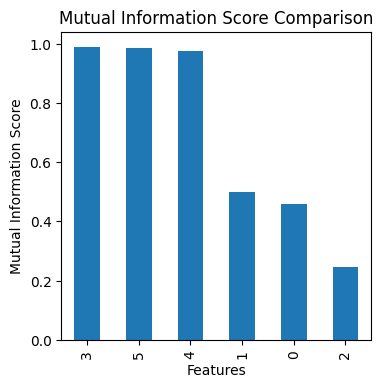

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
MI=pd.Series(MI_score)

#sort the MI score in descnding order
MI.sort_values(ascending=False,inplace=True)

MI.plot.bar()
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')
plt.show()

In [44]:
#Find the index of features that are high MI with the target variable
import numpy as np
to_select = np.where(MI_score>= 0.5)
print('----------------------------------')

print(to_select)
print('----------------------------------')


----------------------------------
(array([3, 4, 5]),)
----------------------------------


In [ ]:
# From the results it can be concluded that features [3, 4, 5] have MI score > 0.5 so, they are correlated to the target variable,
# hence, they are selected.

In [51]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

# Load dataset
org_data = pd.read_csv("/content/drive/MyDrive/CBIT/ML/FeatureEngg-Datasets/Qinspection.csv")

# Separate predictors (X) and target (y)
X = org_data.drop("class", axis=1)   # features
y = org_data["class"]                # target label

# Calculate Mutual Information scores
# MI_score = mutual_info_classif(X, y, random_state=0)

# # Convert to a pandas Series for readability
# MI_score_series = pd.Series(MI_score, index=X.columns)
# print(MI_score_series)
# MI_score_series = MI_score_series.sort_values(ascending=False)

# print("Mutual Information Scores:")
# print(MI_score_series)

# (Optional) Select top k features, e.g. top 3
selector = SelectKBest(score_func=mutual_info_classif, k=3)
X_new = selector.fit_transform(X, y)
print("\nTop 3 selected features:")
print(X.columns[selector.get_support()])



Top 3 selected features:
Index(['feature4', 'feature5', 'feature6'], dtype='object')


In [53]:
df1=pd.DataFrame(X_new,columns=X.columns[selector.get_support()])

In [54]:
label=pd.DataFrame(y)
final=pd.concat([df1,label],axis=1)

In [55]:
final.head()

,feature4,feature5,feature6,class
0,1.3,0.2,0.3,A
1,1.5,0.2,0.3,A
2,1.4,0.2,0.3,A
3,1.7,0.4,0.5,A
4,1.4,0.3,0.4,A
